# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [ ]:
!pip install pymongo

In [ ]:
!pip install pymongo[srv]

In [ ]:
!pip install dnspython

In [ ]:
!pip install tweepy

In [ ]:
!pip install twitter

## Import Python libraries

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [4]:
client = MongoClient(mongod_connect)
db = client.gp23 # use or create a database named demo
tweet_collection = db.lab10 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [5]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [6]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [7]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1325358135507255296
1325358137189167105
1325358141324861440
1325358143858233344
1325358143963066368
1325358144625680384
1325358150749462528
1325358150707503104
1325358150992715777
1325358154717278208
1325358155040129024
1325358154868199426
1325358156403322883
1325358158357749761
1325358158760521730
1325358159133888512
1325358159305691138
1325358161939869696
1325358162275414018
1325358164745744384
1325358166759104514
1325358169464385536
1325358169929834496
1325358173721677825
1325358174912720896
1325358175877541888
1325358176078753793
1325358176695316480
1325358176812806145
1325358176951173124
1325358178549211136
1325358178960207872
1325358179044110336
1325358179518124037
1325358181162299393
1325358181426614272
1325358183737556993
1325358184446500864
1325358187026001920
1325358188644986880
1325358190003941378
1325358190847004672
1325358191497121792
1325358191476170758
1325358191509729282
1325358192805765120
1325358194168918017
1325358195397652485
1325358195896889344
1325358196622581760


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [8]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [9]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [10]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Sun Nov 08 08:45:09 +0000 2020'
'Sun Nov 08 08:45:09 +0000 2020'
'Sun Nov 08 08:45:09 +0000 2020'
'Sun Nov 08 08:45:08 +0000 2020'
'Sun Nov 08 08:45:08 +0000 2020'
'Sun Nov 08 08:45:07 +0000 2020'
'Sun Nov 08 08:45:07 +0000 2020'
'Sun Nov 08 08:45:07 +0000 2020'
'Sun Nov 08 08:45:06 +0000 2020'
'Sun Nov 08 08:45:05 +0000 2020'
'Sun Nov 08 08:45:05 +0000 2020'
'Sun Nov 08 08:45:05 +0000 2020'
'Sun Nov 08 08:45:05 +0000 2020'
'Sun Nov 08 08:45:05 +0000 2020'
'Sun Nov 08 08:45:04 +0000 2020'
'Sun Nov 08 08:45:04 +0000 2020'
'Sun Nov 08 08:45:04 +0000 2020'
'Sun Nov 08 08:45:04 +0000 2020'
'Sun Nov 08 08:45:03 +0000 2020'
'Sun Nov 08 08:45:01 +0000 2020'
'Sun Nov 08 08:45:01 +0000 2020'
'Sun Nov 08 08:45:00 +0000 2020'
'Sun Nov 08 08:45:00 +0000 2020'
'Sun Nov 08 08:45:00 +0000 2020'
'Sun Nov 08 08:45:00 +0000 2020'
'Sun Nov 08 08:45:00 +0000 2020'
'Sun Nov 08 08:44:59 +0000 2020'
'Sun Nov 08 08:44:59 +0000 2020'
'Sun Nov 08 08:44:59 +0000 2020'
'Sun Nov 08 08:44:59 +0000 2020'
'Sun Nov 0

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [11]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Sun Nov 08 08:44:24 +0000 2020'
'Sun Nov 08 08:44:23 +0000 2020'
'Sun Nov 08 08:44:23 +0000 2020'
'Sun Nov 08 08:44:23 +0000 2020'
'Sun Nov 08 08:44:23 +0000 2020'
'Sun Nov 08 08:44:22 +0000 2020'
'Sun Nov 08 08:44:22 +0000 2020'
'Sun Nov 08 08:44:22 +0000 2020'
'Sun Nov 08 08:44:20 +0000 2020'
'Sun Nov 08 08:44:20 +0000 2020'
'Sun Nov 08 08:44:20 +0000 2020'
'Sun Nov 08 08:44:19 +0000 2020'
'Sun Nov 08 08:44:18 +0000 2020'
'Sun Nov 08 08:44:18 +0000 2020'
'Sun Nov 08 08:44:18 +0000 2020'
'Sun Nov 08 08:44:17 +0000 2020'
'Sun Nov 08 08:44:17 +0000 2020'
'Sun Nov 08 08:44:17 +0000 2020'
'Sun Nov 08 08:44:16 +0000 2020'
'Sun Nov 08 08:44:16 +0000 2020'
'Sun Nov 08 08:44:16 +0000 2020'
'Sun Nov 08 08:44:16 +0000 2020'
'Sun Nov 08 08:44:15 +0000 2020'
'Sun Nov 08 08:44:14 +0000 2020'
'Sun Nov 08 08:44:14 +0000 2020'
'Sun Nov 08 08:44:14 +0000 2020'
'Sun Nov 08 08:44:14 +0000 2020'
'Sun Nov 08 08:44:14 +0000 2020'
'Sun Nov 08 08:44:14 +0000 2020'
'Sun Nov 08 08:44:12 +0000 2020'
'Sun Nov 0

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [12]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

4682
4016


Create a text index and print the Tweets containing specific keywords. 

In [13]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [14]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [15]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Melissa Covello
text: @CNN How sad a rigged election is celebrated. They should put everything on hold and have a true election when COVID19 is over.
----
name: #JazeeraaRaajje
text: RT @yumna_maumoon: Congratulations to President-Elect @JoeBiden and Vice President-Elect @KamalaHarris on your historical victory. With the…
----
name: Lil bruh
text: RT @DrTedros: Congratulations to President-elect @JoeBiden &amp; Vice President-Elect  @KamalaHarris! My @WHO colleagues and I look forward to…
----
name: blastnost
text: RT @DrTedros: Congratulations to President-elect @JoeBiden &amp; Vice President-Elect  @KamalaHarris! My @WHO colleagues and I look forward to…
----
name: saurabh verma
text: RT @DrTedros: Congratulations to President-elect @JoeBiden &amp; Vice President-Elect  @KamalaHarris! My @WHO colleagues and I look forward to…
----
name: 𝔹𝕒𝕕𝔸𝕊𝕊𝕊𝕖𝕣𝕪✊🏾BIDEN ELECTED 75,196,516 😎
text: RT @DrTedros: Congratulations to President-elect @JoeBiden &amp; Vice President-Elect  @Kamal

In [16]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [17]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweeted,lang,retweeted_status,quote_count,reply_count,filter_level,timestamp_ms,possibly_sensitive,quoted_status_id,quoted_status_id_str
0,5fa7b09146d6b40d16f356b8,Sun Nov 08 08:13:12 +0000 2020,1325350643985420290,1325350643985420290,@CNN How sad a rigged election is celebrated. ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.325113e+18,...,False,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fa7b08346d6b40d16f35107,Sun Nov 08 08:24:51 +0000 2020,1325353579385937921,1325353579385937921,RT @yumna_maumoon: Congratulations to Presiden...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,en,{'created_at': 'Sat Nov 07 17:06:05 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fa7b08e46d6b40d16f3553e,Sun Nov 08 08:16:19 +0000 2020,1325351430866264064,1325351430866264064,RT @DrTedros: Congratulations to President-ele...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,en,{'created_at': 'Sun Nov 08 08:16:09 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fa7b08d46d6b40d16f35531,Sun Nov 08 08:16:27 +0000 2020,1325351463233597441,1325351463233597441,RT @DrTedros: Congratulations to President-ele...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,en,{'created_at': 'Sun Nov 08 08:16:09 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fa7b08d46d6b40d16f35530,Sun Nov 08 08:16:27 +0000 2020,1325351465725034496,1325351465725034496,RT @DrTedros: Congratulations to President-ele...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,en,{'created_at': 'Sun Nov 08 08:16:09 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5fa7b08d46d6b40d16f3552c,Sun Nov 08 08:16:28 +0000 2020,1325351466211536897,1325351466211536897,RT @DrTedros: Congratulations to President-ele...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,False,en,{'created_at': 'Sun Nov 08 08:16:09 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fa7b08d46d6b40d16f35527,Sun Nov 08 08:16:30 +0000 2020,1325351476932214784,1325351476932214784,RT @DrTedros: Congratulations to President-ele...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,en,{'created_at': 'Sun Nov 08 08:16:09 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fa7b08d46d6b40d16f35524,Sun Nov 08 08:16:32 +0000 2020,1325351485081849856,1325351485081849856,RT @DrTedros: Congratulations to President-ele...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://naattuvartha.byethost33.com"" r...",NaN,...,False,en,{'created_at': 'Sun Nov 08 08:16:09 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5fa7b08d46d6b40d16f3551f,Sun Nov 08 08:16:34 +0000 2020,1325351492576923648,1325351492576923648,RT @DrTedros: Congratulations to President-ele...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,False,en,{'created_at': 'Sun Nov 08 08:16:09 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fa7b08d46d6b40d16f3551c,Sun Nov 08 08:16:35 +0000 2020,1325351498759372801,1325351498759372801,RT @DrTedros: Congratulations to President-el

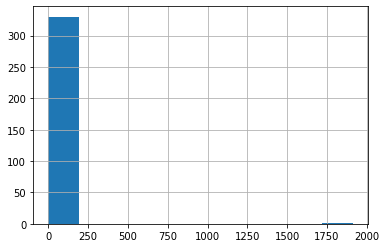

In [19]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count